In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
sns.set(style="whitegrid")

In [17]:
# LOAD FAKE DATA

df = pd.read_csv("../data/synthetic-data.csv")
df.head

<bound method NDFrame.head of           temp     voltage    current       mileage  fault_code
0    44.305621  412.333629  37.368022  10024.195410           0
1    36.811620  415.940710  67.630353  15418.300693           0
2    54.560886  369.003427  46.886782   9061.450307           0
3    40.273808  394.349838  45.686824   8029.884158           0
4    41.962655  408.509981  39.161915   9074.754832           0
..         ...         ...        ...           ...         ...
995  37.098805  414.360683  23.353166  14048.208516           0
996  35.042032  390.111042  77.508473  17819.547544           0
997  41.521882  380.921547  70.234925  13742.467237           0
998  45.966775  368.905699  50.199260  15312.311404           0
999  49.441620  381.752089  46.053124  10919.624897           0

[1000 rows x 5 columns]>

In [18]:
# DATASET SUMMARY

df.describe()

,temp,voltage,current,mileage,fault_code
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.903144,400.748271,49.865756,11927.156880,0.086000
std,5.007393,20.183537,10.021333,3003.702401,0.280504
min,24.191039,337.097212,23.353166,2140.054485,0.000000
25%,36.755584,387.436288,42.985251,9876.024669,0.000000
50%,39.933696,400.017353,49.191979,11864.188704,0.000000
75%,43.141133,413.335926,56.668135,13973.067747,0.000000
max,55.725285,468.784949,83.784581,22332.691137,1.000000


In [41]:
# CHECKING FOR NAs

df = df.dropna()

In [43]:
X = df.drop('fault_code', axis=1)
y = df['fault_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
y_train_df = pd.Series(y_train.values, name='fault_code')

In [46]:
train_data = pd.concat([X_train_df, y_train_df], axis=1)

In [47]:
majority = train_data[train_data.fault_code == 0]
minority = train_data[train_data.fault_code == 1]

In [48]:
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42
                            )

upsampled = pd.concat([majority, minority_upsampled])
upsampled = upsampled.sample(frac=1, random_state=42)

In [49]:
X_train_balanced = upsampled.drop('fault_code', axis=1)
y_train_balanced = upsampled['fault_code']

In [50]:
print(y_train_balanced.value_counts())


fault_code
1    731
0    731
Name: count, dtype: int64


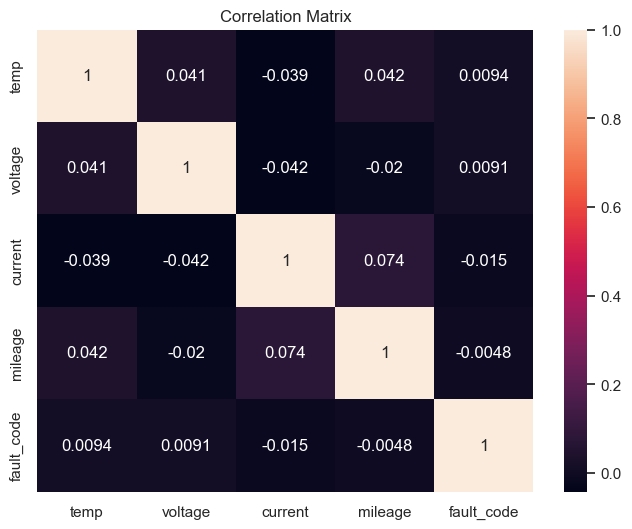

In [51]:
# PLOTTING A HEATMAP

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="rocket")
plt.title("Correlation Matrix")
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest' : RandomForestClassifier(n_estimators=1000, random_state=42),
    'XG Boost' : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector' : SVC(kernel='rbf', probability=True, random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5)
}

result = {}

In [55]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining: {name}")
    
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    result[name] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': report
    }
    
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))





Training: Logistic Regression
Accuracy: 0.4500
Confusion Matrix:
[[85 98]
 [12  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.46      0.61       183
           1       0.05      0.29      0.08        17

    accuracy                           0.45       200
   macro avg       0.46      0.38      0.35       200
weighted avg       0.81      0.45      0.56       200


Training: Random Forest


c:\Users\sonal\Desktop\TATA INNOVENT\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"
c:\Users\sonal\Desktop\TATA INNOVENT\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"


Accuracy: 0.8900
Confusion Matrix:
[[177   6]
 [ 16   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       183
           1       0.14      0.06      0.08        17

    accuracy                           0.89       200
   macro avg       0.53      0.51      0.51       200
weighted avg       0.85      0.89      0.87       200


Training: XG Boost
Accuracy: 0.8800
Confusion Matrix:
[[174   9]
 [ 15   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       183
           1       0.18      0.12      0.14        17

    accuracy                           0.88       200
   macro avg       0.55      0.53      0.54       200
weighted avg       0.86      0.88      0.87       200


Training: Support Vector
Accuracy: 0.5900
Confusion Matrix:
[[114  69]
 [ 13   4]]
Classification Report:
              precision    recall  f1-score   support

  

c:\Users\sonal\Desktop\TATA INNOVENT\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"
c:\Users\sonal\Desktop\TATA INNOVENT\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"


In [57]:
summary_df = pd.DataFrame({
    model: {
        'Accuracy': result[model]['accuracy'],
        'Precision (0)': result[model]['classification_report']['0']['precision'],
        'Recall (0)': result[model]['classification_report']['0']['recall'],
        'Precision (1)': result[model]['classification_report']['1']['precision'],
        'Recall (1)': result[model]['classification_report']['1']['recall']
    }
    for model in result
}).T



In [58]:
summary_df = summary_df.sort_values(by='Accuracy', ascending=False)

print("\n\nModel Comparison Summary:")
print(summary_df)




Model Comparison Summary:
                     Accuracy  Precision (0)  Recall (0)  Precision (1)  \
Random Forest           0.890       0.917098    0.967213       0.142857   
XG Boost                0.880       0.920635    0.950820       0.181818   
KNN                     0.695       0.901316    0.748634       0.041667   
Support Vector          0.590       0.897638    0.622951       0.054795   
Logistic Regression     0.450       0.876289    0.464481       0.048544   

                     Recall (1)  
Random Forest          0.058824  
XG Boost               0.117647  
KNN                    0.117647  
Support Vector         0.235294  
Logistic Regression    0.294118  


In [66]:
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_train_balanced, y_train_balanced)
print("Model trained successfully.")
print("Model Parameters:")
print(best_model.get_params())


Model trained successfully.
Model Parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False

In [67]:
sample_prediction = best_model.predict(X_train_balanced[:5])
print("Sample prediction:", sample_prediction)


Sample prediction: [1 1 0 0 1]


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.695
Precision (macro): 0.4714912280701754
Recall (macro): 0.43314046930247513
F1 Score (macro): 0.4397244546498278


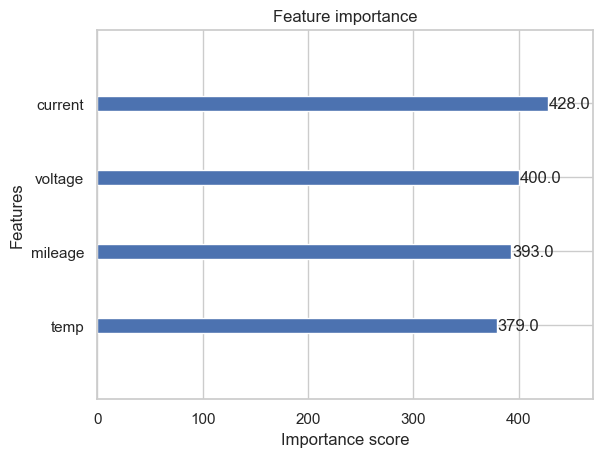

In [69]:
from xgboost import plot_importance

plot_importance(best_model, max_num_features=10)
plt.show()
